In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_city_ride = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
#combined_city_ride['fare'] = pd.to_numeric(combined_city_ride['fare'])

# Display the data table for preview
combined_city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

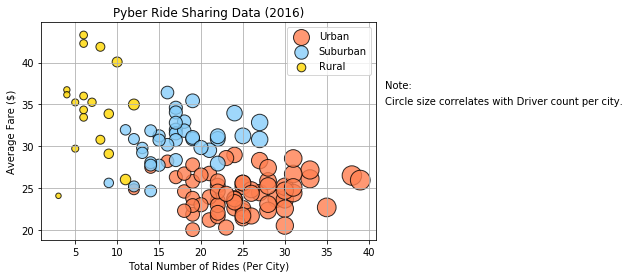

In [4]:
# Obtain the x and y coordinates for each of the three city types

urban_cities = combined_city_ride[combined_city_ride['type'] == 'Urban']
suburban_cities = combined_city_ride[combined_city_ride['type'] == 'Suburban']
rural_cities = combined_city_ride[combined_city_ride['type'] == 'Rural']

urban_fare = urban_cities.groupby(['city']).mean()['fare']
urban_rides = urban_cities.groupby(['city']).count()['ride_id']
urban_drivers= urban_cities.groupby(['city']).count()['driver_count']

suburban_fare = suburban_cities.groupby(['city']).mean()['fare']
suburban_rides = suburban_cities.groupby(['city']).count()['ride_id']
suburban_drivers= suburban_cities.groupby(['city']).count()['driver_count']

rural_fare = rural_cities.groupby(['city']).mean()['fare']
rural_rides = rural_cities.groupby(['city']).count()['ride_id']
rural_drivers= rural_cities.groupby(['city']).count()['driver_count']

# Build the scatter plots for each city types


plt.scatter(urban_rides, urban_fare, s=10*urban_drivers, c='coral', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Urban')

plt.scatter(suburban_rides, suburban_fare, s=10*suburban_drivers, c='lightskyblue', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Suburban')

plt.scatter(rural_rides, rural_fare, s=10*rural_drivers, c='gold', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Create a legend
plt.legend(('Urban', 'Suburban', 'Rural'), loc='best')
# Incorporate a text label regarding circle size

plt.text(42,37, 'Note:')
plt.text(42,35, 'Circle size correlates with Driver count per city.')

# Save Figure
plt.savefig("Images/ride_sharing_data")


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

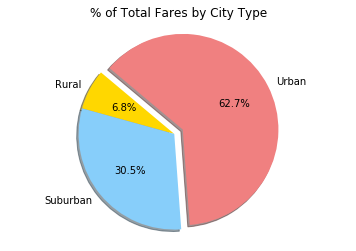

In [20]:
# Calculate Type Percents
type_percents = 100 * combined_city_ride.groupby(['type']).sum()['fare'] / combined_city_ride['fare'].sum()

# Build Pie Chart
lables = ['Rural','Suburban', 'Urban']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(type_percents, explode=explode, labels=lables, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("Images/fares_city_type.png")


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

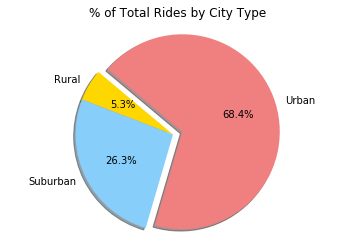

In [22]:
# Calculate Type Percents
type_percents = 100 * combined_city_ride.groupby(['type']).count()['ride_id'] / combined_city_ride['ride_id'].count()

# Build Pie Chart
lables = ['Rural','Suburban', 'Urban']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(type_percents, explode=explode, labels=lables, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("Images/rides_city_type.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

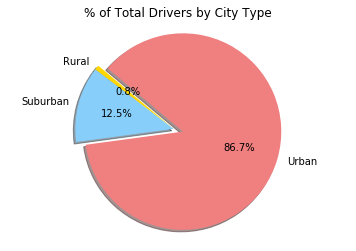

In [30]:
# Calculate Type Percents
type_percents = 100 * combined_city_ride.groupby(['type']).sum()['driver_count'] / combined_city_ride['driver_count'].sum()

# Build Pie Chart
lables = ['Rural','Suburban', 'Urban']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(type_percents, explode=explode, labels=lables, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("Images/drivers_city_type.png")

In [ ]:
# Show Figure
plt.show()